In [64]:
import numpy as np
from google.colab import drive
import sys
import os

# Load data from CSV files
drive.mount('/content/drive')
prefix = '/content/drive/My Drive/'
customized_path_to_your_project= 'Colab Notebooks/'
sys_path = prefix + customized_path_to_your_project
sys.path.append(sys_path)


weatherHistory = np.loadtxt(os.path.join(sys_path, 'weatherHistory.csv'), delimiter=",", dtype=str)
jenaClimate = np.loadtxt(os.path.join(sys_path, 'jena_climate_2009_2016.csv'), delimiter=",", dtype=str)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


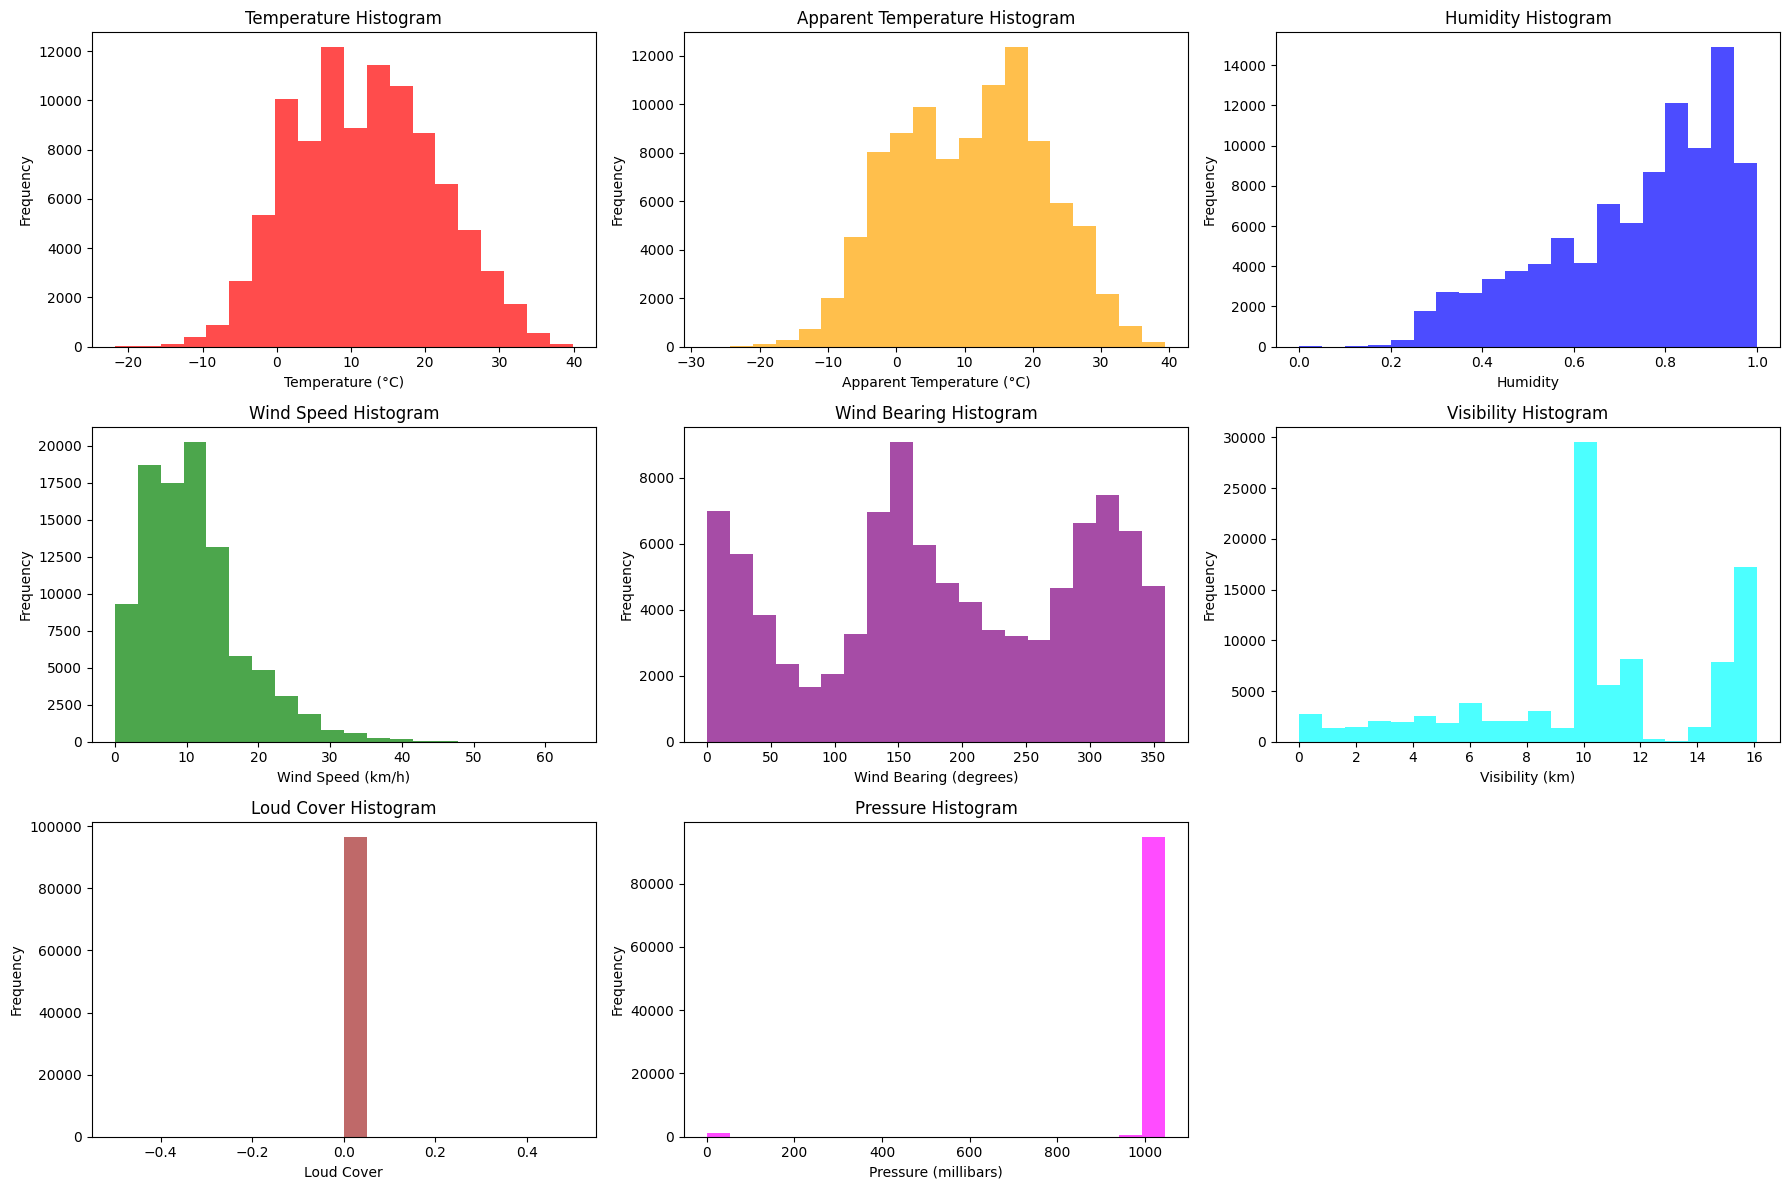

In [ ]:
#Visualize data
import matplotlib.pyplot as plt

# Convert numerical columns to float for visualization
numeric_columns = [3, 4, 5, 6, 7, 8, 9, 10]
# Convert only the numerical columns to float for visualization
weather_data_numeric = weatherHistory[1:, numeric_columns].astype(float)

# Plot histograms for various features
plt.figure(figsize=(18, 12))

# Temperature histogram
plt.subplot(3, 3, 1)
plt.hist(weather_data_numeric[:, 0], bins=20, color='red', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')

# Apparent Temperature histogram
plt.subplot(3, 3, 2)
plt.hist(weather_data_numeric[:, 1], bins=20, color='orange', alpha=0.7)
plt.xlabel('Apparent Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Apparent Temperature Histogram')

# Humidity histogram
plt.subplot(3, 3, 3)
plt.hist(weather_data_numeric[:, 2], bins=20, color='blue', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Histogram')

# Wind Speed histogram
plt.subplot(3, 3, 4)
plt.hist(weather_data_numeric[:, 3], bins=20, color='green', alpha=0.7)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Wind Speed Histogram')

# Wind Bearing histogram
plt.subplot(3, 3, 5)
plt.hist(weather_data_numeric[:, 4], bins=20, color='purple', alpha=0.7)
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Frequency')
plt.title('Wind Bearing Histogram')

# Visibility histogram
plt.subplot(3, 3, 6)
plt.hist(weather_data_numeric[:, 5], bins=20, color='cyan', alpha=0.7)
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.title('Visibility Histogram')

# Loud Cover histogram
plt.subplot(3, 3, 7)
plt.hist(weather_data_numeric[:, 6], bins=20, color='brown', alpha=0.7)
plt.xlabel('Loud Cover')
plt.ylabel('Frequency')
plt.title('Loud Cover Histogram')

# Pressure histogram
plt.subplot(3, 3, 8)
plt.hist(weather_data_numeric[:, 7], bins=20, color='magenta', alpha=0.7)
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.title('Pressure Histogram')

plt.tight_layout()
plt.show()

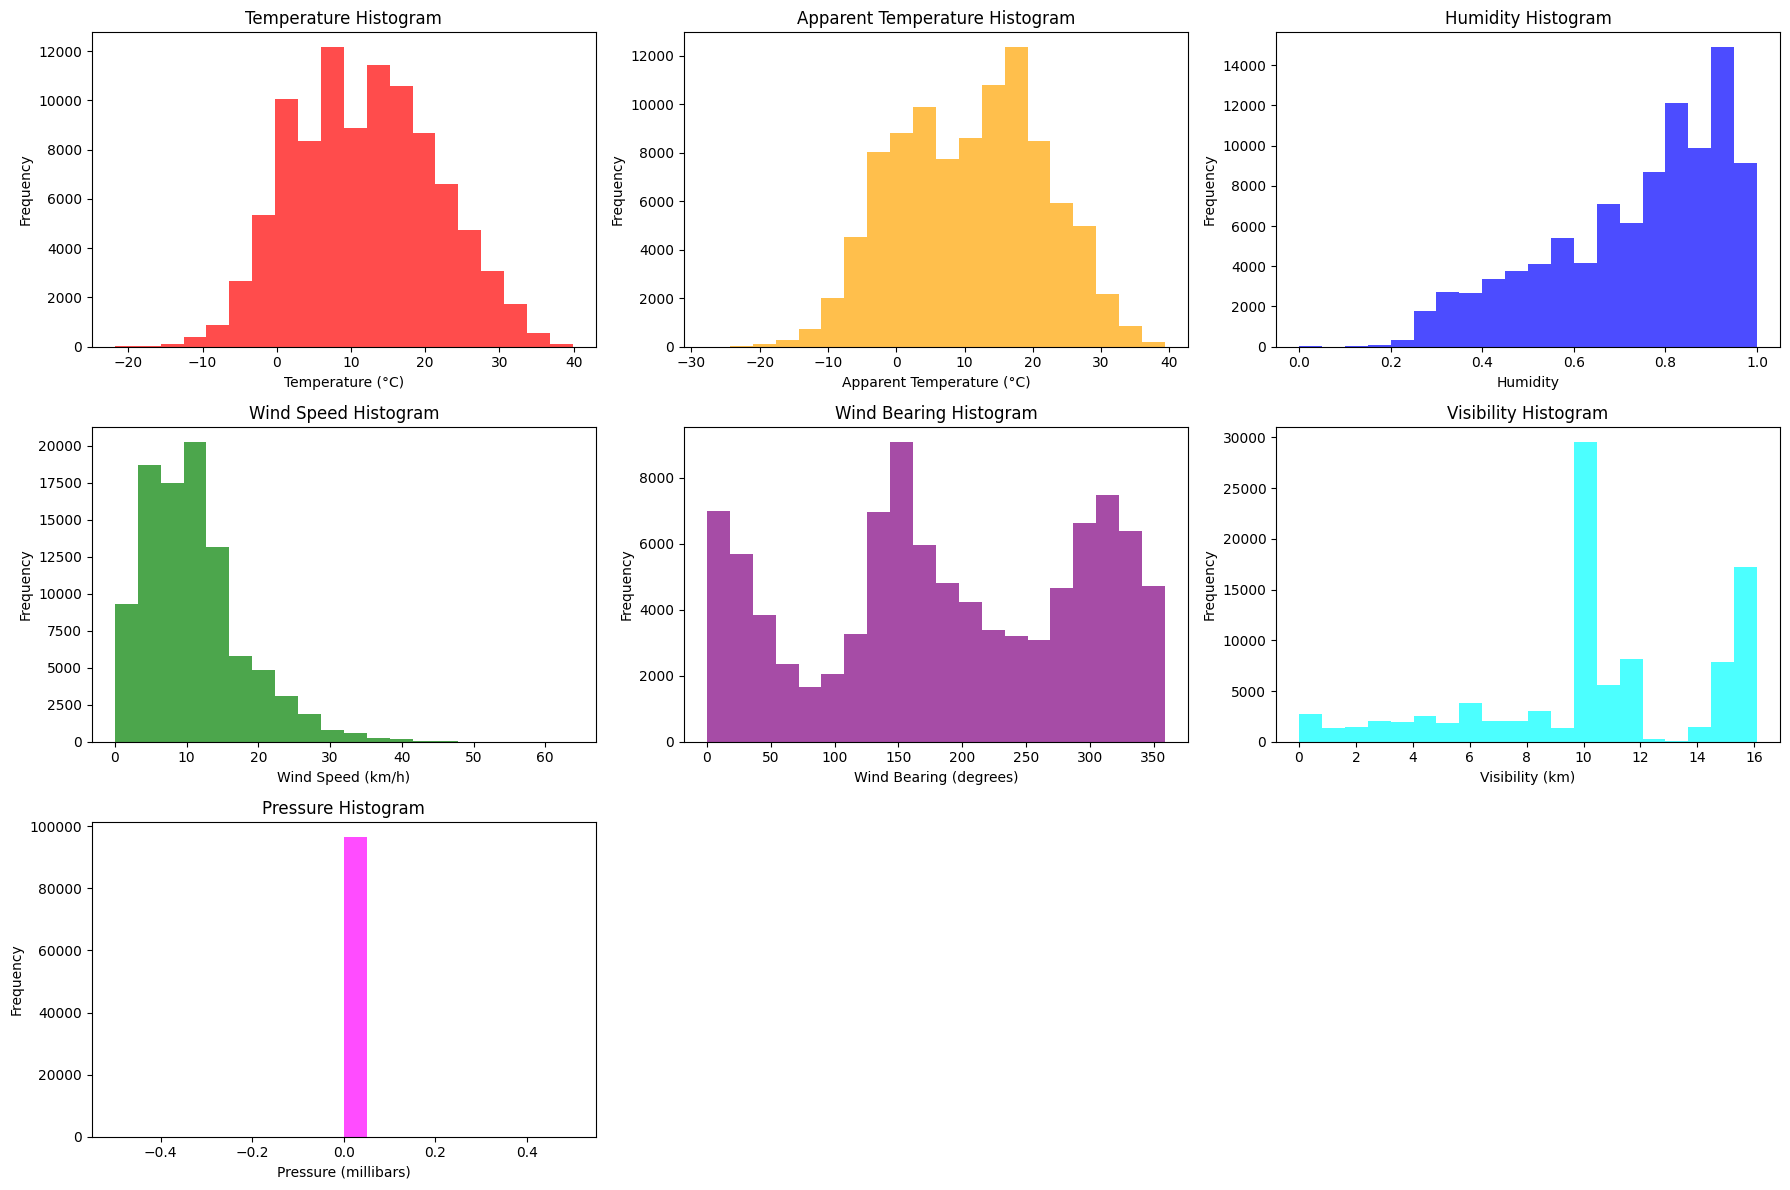

In [65]:
# Preprocess Data

# Exclude daily summary since it is not independent of the row
# Exclude the "Loud Cover" column: Loud cover is always 0, so it can't be learned from
weatherHistory_processed = np.delete(weatherHistory, [9, 11], axis=1)

# Exclude rows where pressure is equal to 0
valid_indices = np.where(weatherHistory_processed[1:, 9] != '0')[0]

# Remove rows where pressure is equal to 0 from weatherHistory
weatherHistory_processed = weatherHistory_processed[np.hstack(([True], valid_indices + 1))]

# Define the column indices containing numerical data
numeric_columns = [3, 4, 5, 6, 7, 8, 9]

# Convert only the numerical columns to float for visualization
weather_data_numeric = weatherHistory[1:, numeric_columns].astype(float)

# Plot histograms for various features
plt.figure(figsize=(18, 12))

# Temperature histogram
plt.subplot(3, 3, 1)
plt.hist(weather_data_numeric[:, 0], bins=20, color='red', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')

# Apparent Temperature histogram
plt.subplot(3, 3, 2)
plt.hist(weather_data_numeric[:, 1], bins=20, color='orange', alpha=0.7)
plt.xlabel('Apparent Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Apparent Temperature Histogram')

# Humidity histogram
plt.subplot(3, 3, 3)
plt.hist(weather_data_numeric[:, 2], bins=20, color='blue', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Histogram')

# Wind Speed histogram
plt.subplot(3, 3, 4)
plt.hist(weather_data_numeric[:, 3], bins=20, color='green', alpha=0.7)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Wind Speed Histogram')

# Wind Bearing histogram
plt.subplot(3, 3, 5)
plt.hist(weather_data_numeric[:, 4], bins=20, color='purple', alpha=0.7)
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Frequency')
plt.title('Wind Bearing Histogram')

# Visibility histogram
plt.subplot(3, 3, 6)
plt.hist(weather_data_numeric[:, 5], bins=20, color='cyan', alpha=0.7)
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.title('Visibility Histogram')

# Pressure histogram
plt.subplot(3, 3, 7)
plt.hist(weather_data_numeric[:, 6], bins=20, color='magenta', alpha=0.7)
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.title('Pressure Histogram')

plt.tight_layout()
plt.show()

In [ ]:
#Decision tree classifier with two predictions: Summary and Precip Type

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract features (X) and targets (y)
X = weatherHistory_processed[1:, 3:].astype(float)  # Features (excluding date and categorical columns)
summary_labels = weatherHistory_processed[1:, 1]  # Summary labels
precip_type_labels = weatherHistory_processed[1:, 2]  # Precip Type labels

# Encode categorical variables
le_summary = LabelEncoder()
le_precip_type = LabelEncoder()
y_summary = le_summary.fit_transform(summary_labels)
y_precip_type = le_precip_type.fit_transform(precip_type_labels)

# Train-test split
X_train, X_test, y_summary_train, y_summary_test, y_precip_type_train, y_precip_type_test = \
    train_test_split(X, y_summary, y_precip_type, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
# For Summary
summary_classifier = DecisionTreeClassifier(random_state=42)
summary_classifier.fit(X_train, y_summary_train)

# For Precip Type
precip_type_classifier = DecisionTreeClassifier(random_state=42)
precip_type_classifier.fit(X_train, y_precip_type_train)

# Predictions for Summary
y_summary_pred = summary_classifier.predict(X_test)
summary_accuracy = accuracy_score(y_summary_test, y_summary_pred)
print("Accuracy for Summary:", summary_accuracy)

# Predictions for Precip Type
y_precip_type_pred = precip_type_classifier.predict(X_test)
precip_type_accuracy = accuracy_score(y_precip_type_test, y_precip_type_pred)
print("Accuracy for Precip Type:", precip_type_accuracy)

Accuracy for Summary: 0.4916282204136644
Accuracy for Precip Type: 0.9939349955938002


In [ ]:
# Try CNN
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Extract features (X) and targets (y)
X = weatherHistory_processed[1:, 3:].astype(float)  # Features (excluding date and categorical columns)
summary_labels = weatherHistory_processed[1:, 1]  # Summary labels
precip_type_labels = weatherHistory_processed[1:, 2]  # Precip Type labels

# Encode categorical variables
le_summary = LabelEncoder()
le_precip_type = LabelEncoder()
y_summary = le_summary.fit_transform(summary_labels)
y_precip_type = le_precip_type.fit_transform(precip_type_labels)

# Train-test split
X_train, X_test, y_summary_train, y_summary_test, y_precip_type_train, y_precip_type_test = \
    train_test_split(X, y_summary, y_precip_type, test_size=0.2, random_state=42)

# Reshape the input data for CNNs
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN Model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_summary)), activation='softmax'),  # Output layer for Summary
    tf.keras.layers.Dense(len(np.unique(y_precip_type)), activation='softmax')  # Output layer for Precip Type
])

# Compile the CNN Model
cnn_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the CNN Model
cnn_model.fit(X_train_cnn, [y_summary_train, y_precip_type_train], epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the CNN Model
test_loss, test_summary_loss, test_precip_loss, test_summary_accuracy, test_precip_accuracy = \
    cnn_model.evaluate(X_test_cnn, [y_summary_test, y_precip_type_test], verbose=0)
print("Test Summary Accuracy (CNN):", test_summary_accuracy)
print("Test Precip Type Accuracy (CNN):", test_precip_accuracy)


Epoch 1/10


AttributeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 592, in update_state
        self.build(y_pred, y_true)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 498, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 646, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 646, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 667, in _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'tuple' object has no attribute 'shape'


In [ ]:
# Try RNN

# Reshape the input data for RNNs (assuming sequence length of 10)
sequence_length = 10
X_train_rnn = np.array([X_train[i:i+sequence_length] for i in range(len(X_train) - sequence_length)])
X_test_rnn = np.array([X_test[i:i+sequence_length] for i in range(len(X_test) - sequence_length)])

# Build the RNN Model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_summary)), activation='softmax'),  # Output layer for Summary
    tf.keras.layers.Dense(len(np.unique(y_precip_type)), activation='softmax')  # Output layer for Precip Type
])

# Compile the RNN Model
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the RNN Model
rnn_model.fit(X_train_rnn, [y_summary_train[sequence_length:], y_precip_type_train[sequence_length:]], epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the RNN Model
test_loss, test_summary_loss, test_precip_loss, test_summary_accuracy, test_precip_accuracy = \
    rnn_model.evaluate(X_test_rnn, [y_summary_test[sequence_length:], y_precip_type_test[sequence_length:]], verbose=0)
print("Test Summary Accuracy (RNN):", test_summary_accuracy)
print("Test Precip Type Accuracy (RNN):", test_precip_accuracy)


Epoch 1/10


AttributeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 592, in update_state
        self.build(y_pred, y_true)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 498, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 646, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 646, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 667, in _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'tuple' object has no attribute 'shape'


In [ ]:
# Try LSTM

# Build the LSTM Model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_summary)), activation='softmax'),  # Output layer for Summary
    tf.keras.layers.Dense(len(np.unique(y_precip_type)), activation='softmax')  # Output layer for Precip Type
])

# Compile the LSTM Model
lstm_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the LSTM Model
lstm_model.fit(X_train_rnn, [y_summary_train[sequence_length:], y_precip_type_train[sequence_length:]], epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the LSTM Model
test_loss, test_summary_loss, test_precip_loss, test_summary_accuracy, test_precip_accuracy = \
    lstm_model.evaluate(X_test_rnn, [y_summary_test[sequence_length:], y_precip_type_test[sequence_length:]], verbose=0)
print("Test Summary Accuracy (LSTM):", test_summary_accuracy)
print("Test Precip Type Accuracy (LSTM):", test_precip_accuracy)


Epoch 1/10


AttributeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 592, in update_state
        self.build(y_pred, y_true)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 498, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 646, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 646, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 667, in _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'tuple' object has no attribute 'shape'


In [66]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train Random Forest Classifier for Summary
rf_summary_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_summary_model.fit(X_train, y_summary_train)

# Train Gradient Boosting Classifier for Summary
gb_summary_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_summary_model.fit(X_train, y_summary_train)

# Train Support Vector Classifier for Summary
svm_summary_model = SVC(kernel='linear', random_state=42)
svm_summary_model.fit(X_train, y_summary_train)

# Train Random Forest Classifier for Precip Type
rf_precip_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_precip_model.fit(X_train, y_precip_type_train)

# Train Gradient Boosting Classifier for Precip Type
gb_precip_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_precip_model.fit(X_train, y_precip_type_train)

# Train Support Vector Classifier for Precip Type
svm_precip_model = SVC(kernel='linear', random_state=42)
svm_precip_model.fit(X_train, y_precip_type_train)

# Evaluate models
rf_summary_acc = accuracy_score(y_summary_test, rf_summary_model.predict(X_test))
gb_summary_acc = accuracy_score(y_summary_test, gb_summary_model.predict(X_test))
svm_summary_acc = accuracy_score(y_summary_test, svm_summary_model.predict(X_test))
rf_precip_acc = accuracy_score(y_precip_type_test, rf_precip_model.predict(X_test))
gb_precip_acc = accuracy_score(y_precip_type_test, gb_precip_model.predict(X_test))
svm_precip_acc = accuracy_score(y_precip_type_test, svm_precip_model.predict(X_test))

# Print results
print("Summary Prediction Models:")
print("Random Forest Accuracy:", rf_summary_acc)
print("Gradient Boosting Accuracy:", gb_summary_acc)
print("Support Vector Machine Accuracy:", svm_summary_acc)
print("\nPrecip Type Prediction Models:")
print("Random Forest Accuracy:", rf_precip_acc)
print("Gradient Boosting Accuracy:", gb_precip_acc)
print("Support Vector Machine Accuracy:", svm_precip_acc)

Summary Prediction Models:
Random Forest Accuracy: 0.5826196605895024
Gradient Boosting Accuracy: 0.5356486103084117
Support Vector Machine Accuracy: 0.5020753428256186

Precip Type Prediction Models:
Random Forest Accuracy: 0.9957442336993643
Gradient Boosting Accuracy: 0.9949035885041769
Support Vector Machine Accuracy: 0.9927494351915095
